In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('loan_approval_dataset.csv')

In [3]:
data.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
data.shape

(4269, 13)

In [5]:
data.dtypes


loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [6]:
data.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

we can say that here we have got loan_status as the target variable and this a categorical varibale

# missing values

In [7]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

so there is no missing values in the dataset

# eda

so let's start the eda analysis with the target variable

Text(0.5, 1.0, 'Loan approval plot')

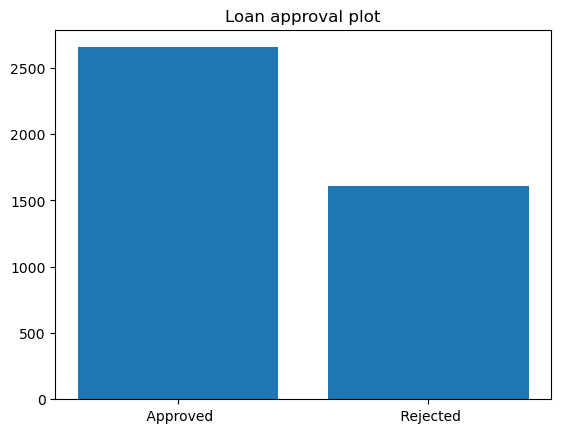

In [8]:
loan_count=data[' loan_status'].value_counts()
plt.bar(loan_count.index,loan_count.values)
plt.title('Loan approval plot')

there are around 2500 approved loans and almost 1600 rejected ones 

Text(0.5, 1.0, 'dependents')

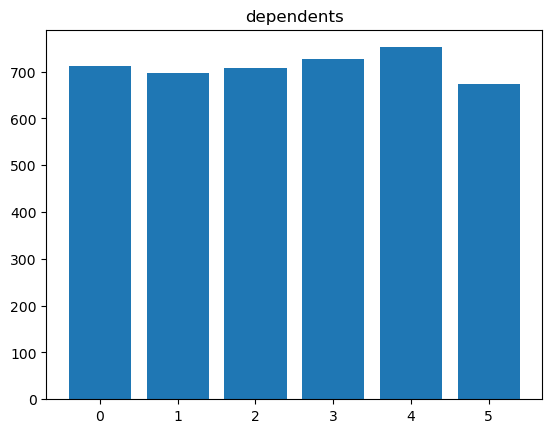

In [9]:
dependents=data[' no_of_dependents'].value_counts()
plt.bar(dependents.index,dependents.values)
plt.title('dependents')

from the above graph we can conclude that the no of dependents is almost evenly distrubuted through out this dataset

([<matplotlib.patches.Wedge at 0x2a5686bcc90>,
 [Text(-0.007690158301815536, 1.0999731185193997, ' Graduate'),
  Text(0.007690158301814913, -1.0999731185193997, ' Not Graduate')],
 [Text(-0.004194631800990292, 0.5999853373742179, '50.2%'),
  Text(0.004194631800989952, -0.5999853373742179, '49.8%')])

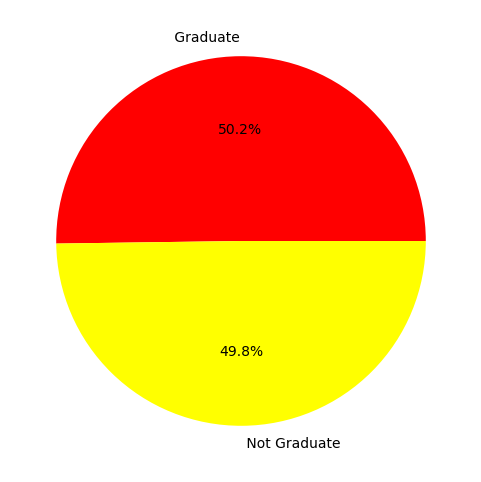

In [10]:
education=data[' education'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(education,labels=education.index,colors=['red','yellow'],autopct='%1.1f%%',startangle=0)

([<matplotlib.patches.Wedge at 0x2a5685f3d10>,
 [Text(-0.012546930512713562, 1.0999284406427126, ' Yes'),
  Text(0.012546930512713182, -1.0999284406427126, ' No')],
 [Text(-0.006843780279661942, 0.5999609676232978, '50.4%'),
  Text(0.006843780279661735, -0.5999609676232978, '49.6%')])

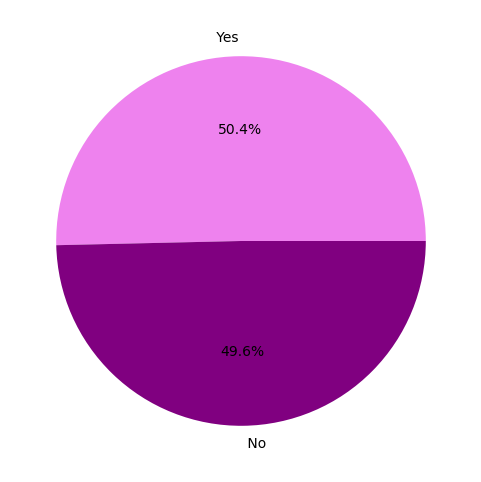

In [11]:
employed=data[' self_employed'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(employed,labels=employed.index,colors=['violet','purple'],autopct='%1.1f%%',startangle=0)

<Axes: xlabel=' education', ylabel='count'>

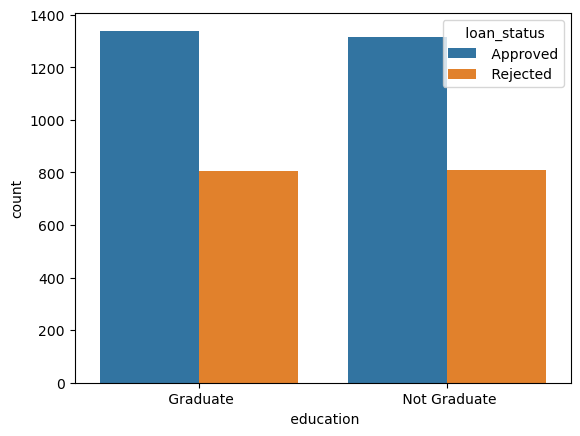

In [12]:
sns.countplot(x=data[' education'],hue=data[' loan_status'])


<Axes: xlabel=' self_employed', ylabel='count'>

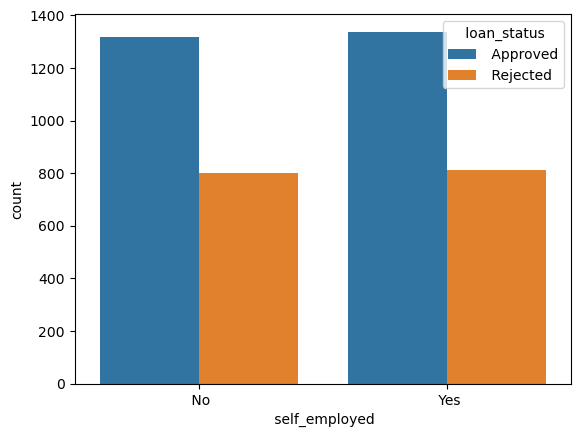

In [13]:
sns.countplot(x=data[' self_employed'],hue=data[' loan_status'])

<Axes: xlabel=' no_of_dependents', ylabel='count'>

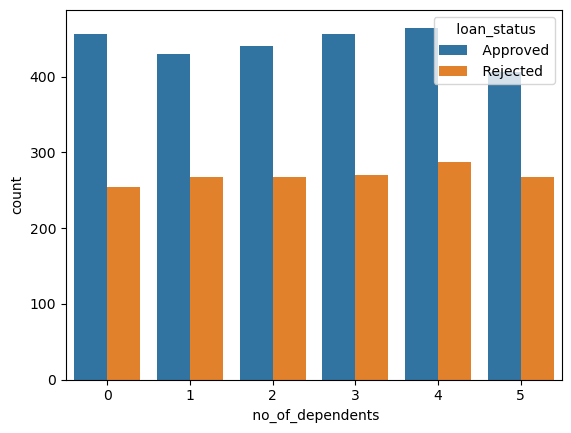

In [14]:
sns.countplot(x=data[' no_of_dependents'],hue=data[' loan_status'])

# Outlier detection in income and loan amount

{'whiskers': [<matplotlib.lines.Line2D at 0x2a567daaed0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a568704410>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a56856c290>],
 'medians': [<matplotlib.lines.Line2D at 0x2a56880da90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a56880e550>],
 'means': []}

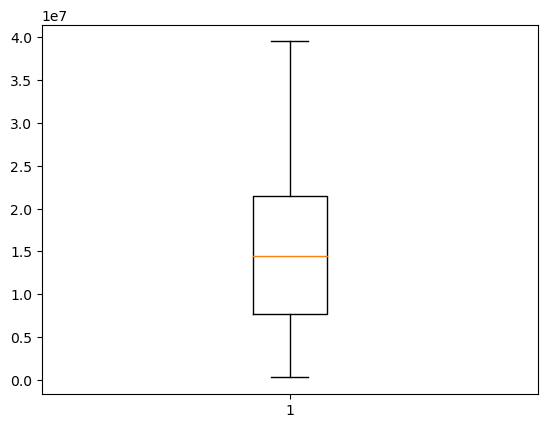

In [15]:
plt.boxplot(data[' loan_amount'])

seems there is no outlier in loan amount

{'whiskers': [<matplotlib.lines.Line2D at 0x2a56887c150>,
 'caps': [<matplotlib.lines.Line2D at 0x2a56887d610>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a56886f350>],
 'medians': [<matplotlib.lines.Line2D at 0x2a56887ed50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a56887d0d0>],
 'means': []}

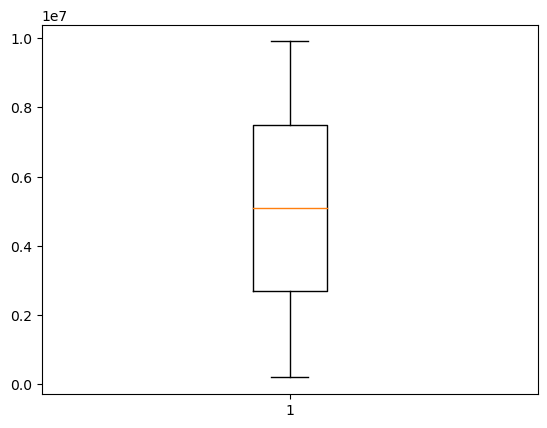

In [16]:
plt.boxplot(data[' income_annum'])

# Cibil score

####
A Credit Information Bureau (CIBIL) score is a numerical representation of an individual's creditworthiness. It is a three-digit number that ranges from 300 to 900 in India. The score is derived from the individual's credit history and repayment behavior. CIBIL is one of the credit bureaus in India that provides credit information and scores.

<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

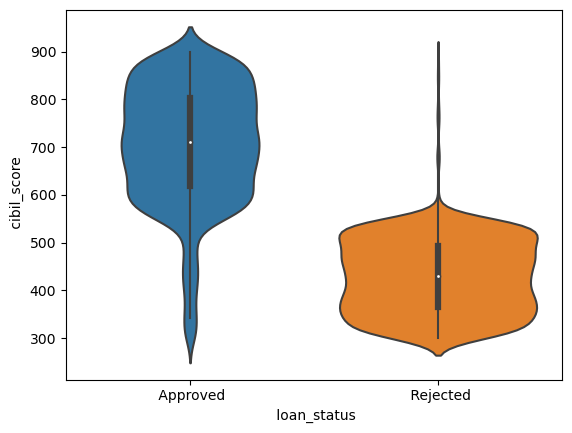

In [17]:
sns.violinplot(x=data[' loan_status'],y=data[' cibil_score'])

as we can see a cibil score below 500 is mostly rejected and above 500 is mainly accepted

# preprocessing

In [18]:
df=data.copy()

In [19]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


we made this copy of the dataset for model training purpose 

In [20]:
df.drop(columns=['loan_id'],inplace=True)

### first we will use label encoder for the columns education,self_employed,loan_status

In [21]:
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()


df[' loan_status'] = encoder.fit_transform(df[' loan_status'])
df[' education'] = encoder.fit_transform(df[' education'])
df[' self_employed'] = encoder.fit_transform(df[' self_employed'])


print(df[[' education', ' self_employed', ' loan_status']])


       education   self_employed   loan_status
0              0               0             0
1              1               1             1
2              0               0             1
3              0               0             1
4              1               1             1
...          ...             ...           ...
4264           0               1             1
4265           1               1             0
4266           1               0             1
4267           1               0             0
4268           0               0             0

[4269 rows x 3 columns]


# model buliding

#### train_test_split

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=[' loan_status']),df[' loan_status'],test_size=0.2,random_state=42)

In [23]:
x_train.shape

(3415, 11)

In [24]:
x_test.shape

(854, 11)

## Decision tree classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
model1=DecisionTreeClassifier(random_state=42)

model1.fit(x_train,y_train)


DecisionTreeClassifier(random_state=42)

In [26]:
y_pred=model1.predict(x_test)

In [27]:
conf_mat=confusion_matrix(y_test,y_pred.round())

In [28]:
conf_mat

array([[527,   9],
       [ 10, 308]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

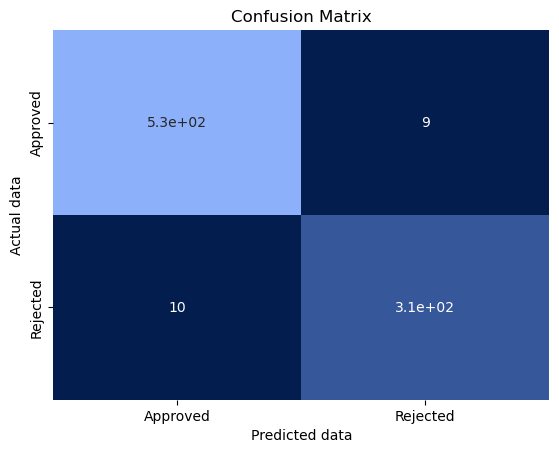

In [29]:
sns.heatmap(conf_mat,annot=True,cbar=False,cmap=["#041d4f","#365799","#8cb1fa"],xticklabels=['Approved', 'Rejected'],
                   yticklabels=['Approved', 'Rejected'],)
plt.xlabel('Predicted data')
plt.ylabel('Actual data')
plt.title('Confusion Matrix')

## RandomForest

In [30]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(random_state=42)
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)

Text(0.5, 1.0, 'Confusion Matrix')

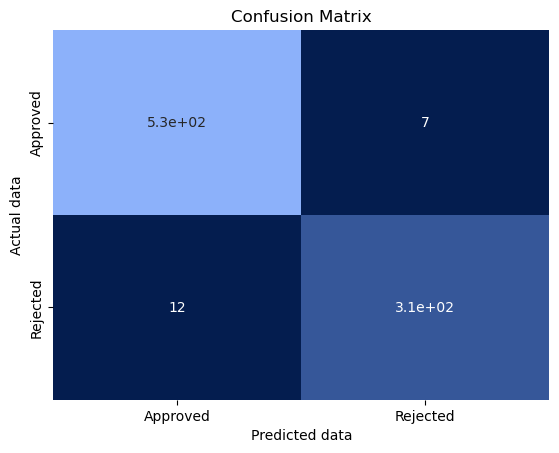

In [31]:
conf_mat2=confusion_matrix(y_test,y_pred2.round())
sns.heatmap(conf_mat2,annot=True,cbar=False,cmap=["#041d4f","#365799","#8cb1fa"],xticklabels=['Approved', 'Rejected'],
                   yticklabels=['Approved', 'Rejected'],)
plt.xlabel('Predicted data')
plt.ylabel('Actual data')
plt.title('Confusion Matrix')

## comparing the accuracy and precision score

In [32]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.9716088328075709

In [33]:
precision_score(y_test,y_pred2)

0.9776357827476039

In [34]:
comp=pd.DataFrame({'Model':['Decision Tree','Random Forest'],'Precision':[precision_score(y_test,y_pred),precision_score(y_test,y_pred2)],'Accuracy':[model1.score(x_test, y_test),model2.score(x_test, y_test)]})

In [35]:
comp

,Model,Precision,Accuracy
0,Decision Tree,0.971609,0.977752
1,Random Forest,0.977636,0.977752


#### well we can say that the randomforest is working slightly better than the decision tree

In [36]:
import pickle


In [37]:
pickle_out=open("classifier1.pkl","wb")
pickle.dump(model2,pickle_out)
pickle_out.close

<function BufferedWriter.close>